**23/03/22**

In [7]:
from PIL import Image
import random

# Convert encoding data into 8-bit binary
def genData(data):

		newd = [] # binary code list of image pixels 

		for i in data:
			newd.append(format(ord(i), '08b')) #convert to binary 
		return newd

# Pixels are modified according to the
# 8-bit binary data and finally returned
def modifiedPix(pix, data):

	datalist = genData(data) # binary converted list
	lendata = len(datalist)# length of binary data
	imdata = iter(pix) # iterate by every pixel

	for i in range(lendata):

		# 3 pixels(r,g,b) extracting at a time
		pix = [value for value in imdata.__next__()[:3] 
          + imdata.__next__()[:3] 
          + imdata.__next__()[:3]]

		# Changing pixel values, odd for 1 and 0 for even
		for j in range(0, 8):
			if (datalist[i][j] == '0' and pix[j]% 2 != 0):
				pix[j] -= 1

			elif (datalist[i][j] == '1' and pix[j] % 2 == 0):
				if(pix[j] != 0):
					pix[j] -= 1
				else:
					pix[j] += 1

		# Eighth pixel of every set tells
		# whether to stop or read further.
		# 0 means keep reading; 1 means thec
		# message is over.
		if (i == lendata - 1):
			if (pix[-1] % 2 == 0):
				if(pix[-1] != 0):
					pix[-1] -= 1
				else:
					pix[-1] += 1

		else:
			if (pix[-1] % 2 != 0):
				pix[-1] -= 1

		pix = tuple(pix)
		yield pix[0:3] # returning tuples of pixels
		yield pix[3:6]
		yield pix[6:9]
		
def encode_img(newimg, data, pwd):

	#Getting image size like 1166 
	w = newimg.size[0]
	(x, y) = (0, 0) 
	data_new = data + '$' + pwd
	for pixel in modifiedPix(newimg.getdata(), data_new):

		# Putting modified pixels in the new image
		newimg.putpixel((x, y), pixel)
		if (x == w - 1):
			x = 0
			y += 1
		else:
			x += 1

# Encode data into image
def encode():
	# img = input("Enter image name(with extension) : ")
	for fno in range(1,110):

		img = '/content/folder/Image Data Set FINAL/Image Data Set FINAL/GROUP ORIGINAL IMAGES/IMG'+str(fno)+'.PNG'
		image = Image.open(img,'r')
	
		myfile=open('/content/folder/Image Data Set FINAL/Image Data Set FINAL/Message and Password/IMG'+str(fno)+'.TXT',"a")
	
	# data = input("Enter data to be encoded : ")
		data=random.choice(MESSAGES)
		myfile.write("Message: "+data)
		if (len(data) == 0):
			raise ValueError('Data is empty')

	# pwd = input("Enter Password to be encoded : ")
		pwd=random.choice(PASSWORDS)
		myfile.write("\nPassword: "+pwd)
		myfile.close()
		if (len(pwd) == 0):
			raise ValueError('Data is empty')
	 
		newimg = image.copy()
	#print(newimg)
		encode_img(newimg, data, pwd)

	# new_img_name = input("Enter the name of new image(with extension) : ")
		new_img_name=img.replace('.PNG','s.PNG')
		newimg.save(new_img_name, str(new_img_name.split(".")[1].upper()))

# Decode the data in the image
def decode():
	img = input("Enter image name(with extension) : ")
	image = Image.open(img, 'r')

	pwd = input("Enter Password : ")
	data = ''
	imgdata = iter(image.getdata())

	while (True):
		pixels = [value for value in imgdata.__next__()[:3] +
								imgdata.__next__()[:3] +
								imgdata.__next__()[:3]]

		# string of binary data
		binstr = ''

		for i in pixels[:8]:
			if (i % 2 == 0):
				binstr += '0'
			else:
				binstr += '1'

		data += chr(int(binstr, 2))
		if (pixels[-1] % 2 != 0):
			 data = data.split("$")
			 if(data[1] == pwd):
				 return data[0]
MESSAGES = [
    "a",
    "Paris",
    "steganography is cool and fun",
    "Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.",
    "a"*10,
    "Paris"*10,
    "steganography is cool and fun"*10,
    "Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum." * 10
]

PASSWORDS = ['123',
             'password',
						  'liverpool',
							'letmein',
							'123456',
							'qwerty',
							'charlie',
							'monkey',
							'arsenal',
							'thomas']
# Main Function
def main():
	while(True):
		ch = int(input(":: Welcome to Steganography ::\n"
						"1. Encode\n2. Decode\n3. Exit\n"))
		if(ch==1):
				encode()
	  
		elif(ch==2):
				print("Decoded Word : " + decode() + "\n")
	  
		elif(ch==3):
				break
		
		else:
				raise Exception("Enter correct input")

# Driver Code
if __name__ == '__main__' :


	# Calling main function
	main()

:: Welcome to Steganography ::
1. Encode
2. Decode
3. Exit
2
Enter image name(with extension) : /content/folder/Image Data Set FINAL/Image Data Set FINAL/Stego Images/IMG1s.PNG
Enter Password : letmein
Decoded Word : ParisParisParisParisParisParisParisParisParisParis

:: Welcome to Steganography ::
1. Encode
2. Decode
3. Exit
3


In [ ]:
# from google.colab import files
# for i in range(1,110):
#   files.download('/content/folder/IMG'+str(i)+'.TXT')
#   files.download('/content/folder/GROUP ORIGINAL IMAGES/IMG'+str(i)+'s.PNG')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Group Project/Image Data Set FINAL.zip" -d "/content/folder/"

In [3]:
import os

input_dir = "/content/folder/Image Data Set FINAL/Image Data Set FINAL/GROUP ORIGINAL IMAGES"
target_dir = "/content/folder/Image Data Set FINAL/Image Data Set FINAL/Stego Images"
img_size = (160, 160)
num_classes = 1
batch_size = 5

input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".PNG")
    ]
)

target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".PNG") and not fname.startswith(".")
    ]
)



In [4]:
print("Number of samples:", len(input_img_paths))
print("Number of samples:", len(target_img_paths))

Number of samples: 109
Number of samples: 109


In [5]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img

#Sequence are a safer way to do multiprocessing. This structure guarantees that the network will only train once on each sample per epoch which is not the case with generators.
class stego(keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)
            x[j] = img
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        for j, path in enumerate(batch_target_img_paths):
            img = load_img(path, target_size=self.img_size, color_mode="grayscale")
            y[j] = np.expand_dims(img, 2)
            # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            y[j] -= 1
        return x, y

In [6]:
from tensorflow.keras import layers


def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,)) #3 no of channels

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)  #32 is feature dimension
    x = layers.BatchNormalization()(x) #for fast learning
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation   
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
model = get_model(img_size, num_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 80, 80, 32)   896         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 80, 80, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [7]:
import random

# Split our img paths into a training and a validation set
val_samples = 15
random.Random(15).shuffle(input_img_paths)
random.Random(15).shuffle(target_img_paths)
train_input_img_paths = input_img_paths[:-val_samples]
train_target_img_paths = target_img_paths[:-val_samples]
val_input_img_paths = input_img_paths[-val_samples:]
val_target_img_paths = target_img_paths[-val_samples:]

# Instantiate data Sequences for each split
train_gen = stego(
    batch_size, img_size, train_input_img_paths, train_target_img_paths
)
val_gen = stego(batch_size, img_size, val_input_img_paths, val_target_img_paths)

In [8]:
# Configure the model for training.
# We use the "sparse" version of categorical_crossentropy
# because our target data is integers.
model.compile(optimizer="rmsprop", loss="CategoricalCrossentropy")

epochs = 5
model.fit(train_gen, epochs=epochs, validation_data=val_gen)

Epoch 1/5
18/18 [==============================] - 30s 1s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/5
18/18 [==============================] - 24s 1s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5
18/18 [==============================] - 25s 1s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/5
18/18 [==============================] - 24s 1s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
18/18 [==============================] - 24s 1s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00


**Steg Analysis Without Neural Network**


In [10]:
!pip install stegano

     |████████████████████████████████| 301 kB 5.1 MB/s 
     |████████████████████████████████| 3.1 MB 42.1 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Original Image File Name: IMG39.PNG
Stego Image File Name: IMG39s.PNG
Message: aaaaaaaaaa

Password: password
Number of Characters in message:  38
similarity of cosine:  0.9999682239457744
dissimilarity of cosine:  3.177605422555185e-05
MSE:  8.600952346157124e-05
PSNR:  88.78533819417126
RMSE:  5.580767652455582e-05
-----------------------------------------------------------------
Original Image File Name: IMG106.PNG
Stego Image File Name: IMG106s.PNG
Message: Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididu

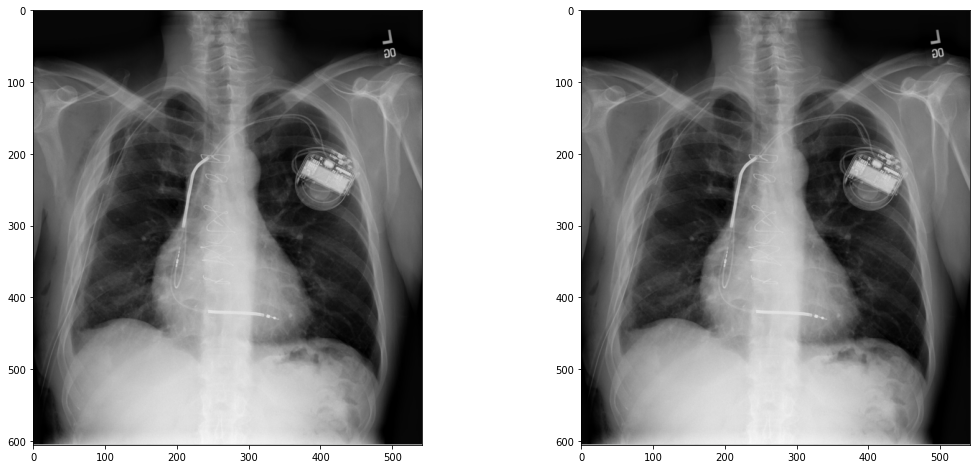

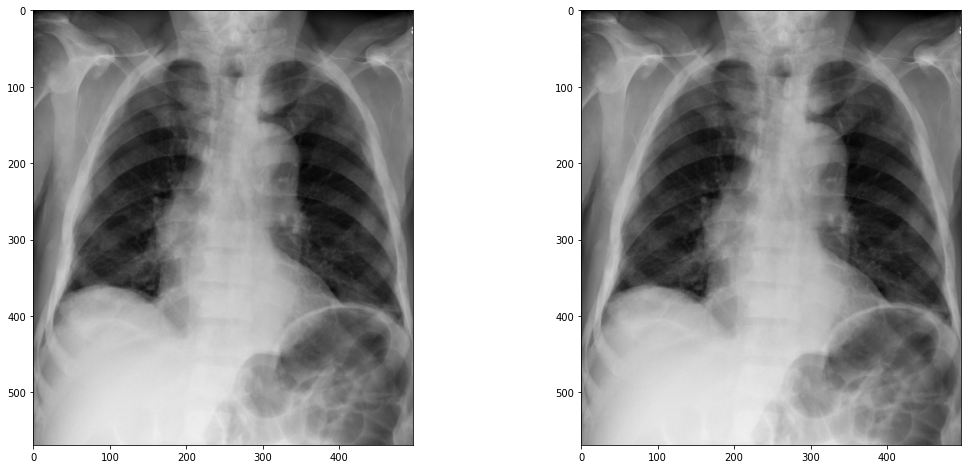

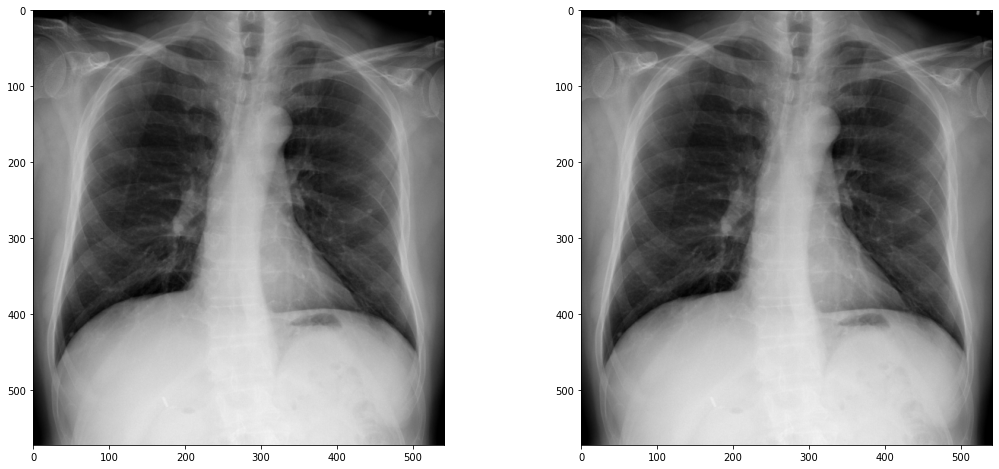

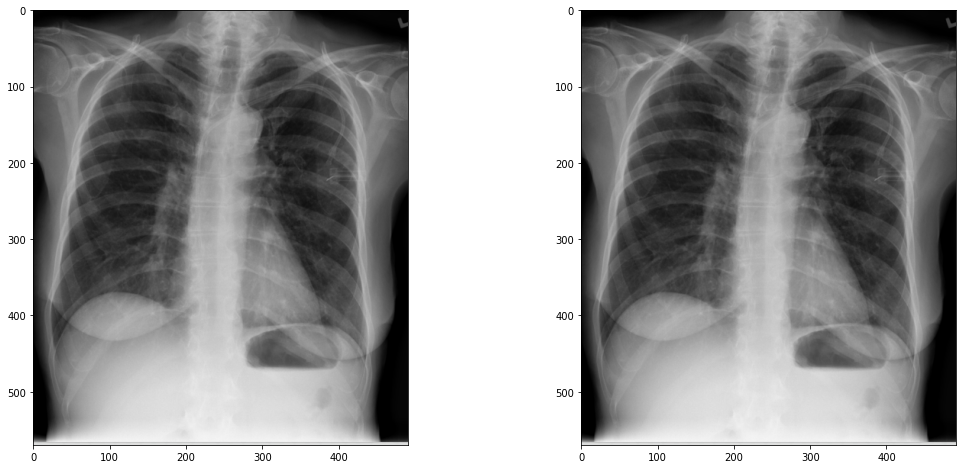

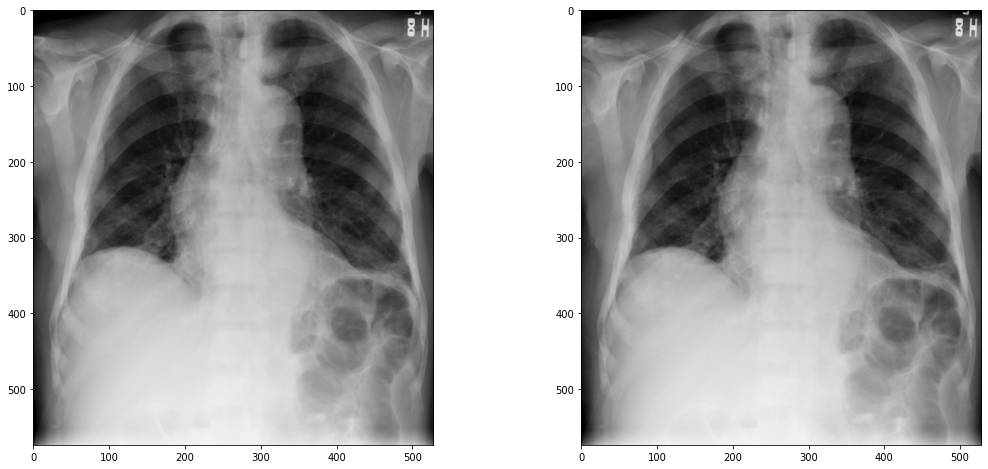

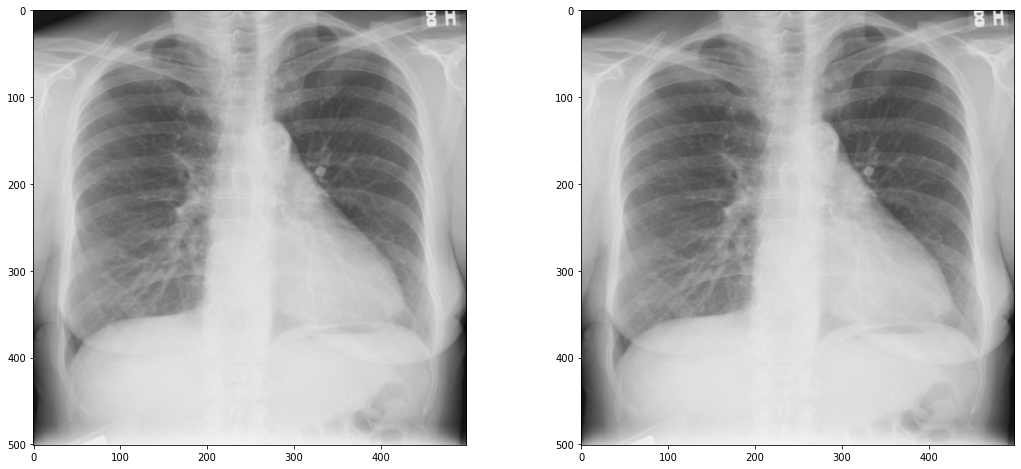

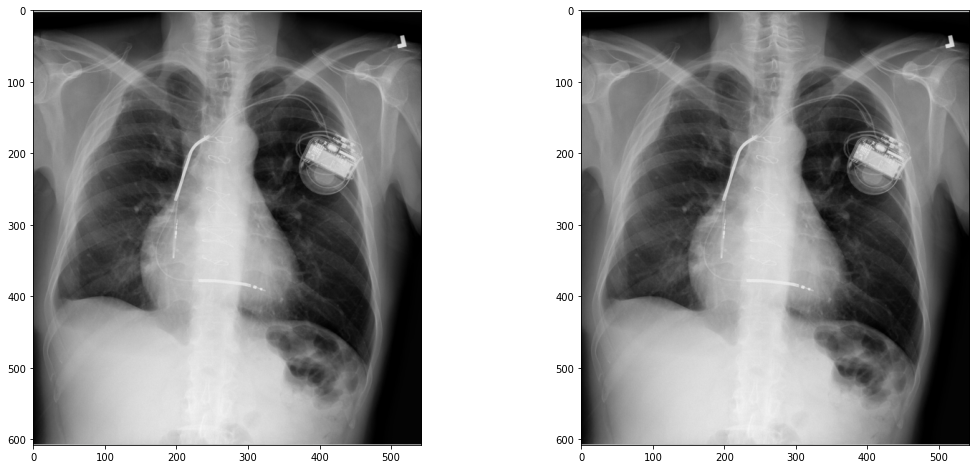

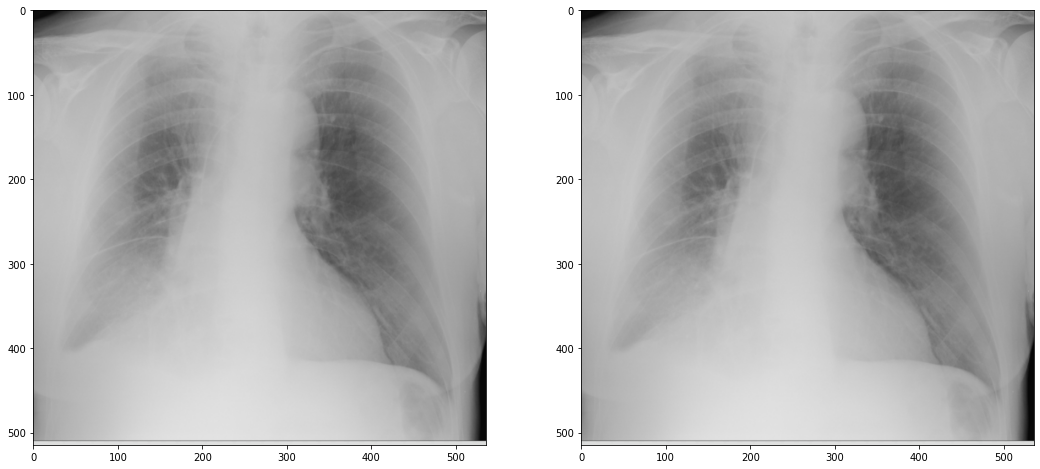

In [19]:
from stegano import lsb 
import skimage.io as sk
import matplotlib.pyplot as plt
from scipy import spatial
from tqdm import tqdm
from skimage import metrics

from PIL import Image
from random import shuffle


import numpy as np # linear algebra
import pandas as pd 

list_mse=[]
list_psnr=[]
list_rmse=[]
list_ch_len=[]
list_s_cos=[]
list_ds_cos=[]

for fn in random.sample(range(1,110),8):

  image = sk.imread("/content/folder/Image Data Set FINAL/Image Data Set FINAL/GROUP ORIGINAL IMAGES/IMG"+str(fn)+".PNG")
  secret = sk.imread("/content/folder/Image Data Set FINAL/Image Data Set FINAL/Stego Images/IMG"+str(fn)+"s.PNG")

  img1 = sk.imread("/content/folder/Image Data Set FINAL/Image Data Set FINAL/GROUP ORIGINAL IMAGES/IMG"+str(fn)+".PNG")
  img2 = sk.imread("/content/folder/Image Data Set FINAL/Image Data Set FINAL/Stego Images/IMG"+str(fn)+"s.PNG")

  myfile=open("/content/folder/Image Data Set FINAL/Image Data Set FINAL/Message and Password/IMG"+str(fn)+".TXT",'r')

  fig,ax = plt.subplots(1,2,figsize=(18,8))
    
  ax[0].imshow(img1)
  ax[1].imshow(img2)

# print(image.shape)
# print(secret.shape)

  h, w, c = image.shape
  h1, w1, c1 = secret.shape

  vec1 = np.reshape(img1,(h*w*c))
  vec2 = np.reshape(img2,(h1*w1*c1))

  print("Original Image File Name: IMG"+str(fn)+".PNG")
  print("Stego Image File Name: IMG"+str(fn)+"s.PNG")
  lines=myfile.readlines()
  for f in lines:
    print(f)
  myfile.seek(0)
  ch=len(myfile.read())
  print("Number of Characters in message: ",ch)
  list_ch_len.append(ch)
  myfile.close()
  
  s_cos = 1 - spatial.distance.cosine(vec1,vec2)
  ds_cos = spatial.distance.cosine(vec2,vec1)
  print("similarity of cosine: ",s_cos)
  print("dissimilarity of cosine: ",ds_cos)
  list_s_cos.append(s_cos)
  list_ds_cos.append(ds_cos)

  mse=metrics.mean_squared_error(image,secret)
  psnr = metrics.peak_signal_noise_ratio(image, secret,
                                data_range=image.max()-image.min())

  rmse=metrics.normalized_root_mse(image, secret, normalization='euclidean')

  list_mse.append(mse)
  list_psnr.append(psnr)
  list_rmse.append(rmse)

  print('MSE: ',mse)
  print('PSNR: ',psnr)
  print('RMSE: ',rmse)
  print("-----------------------------------------------------------------")



In [20]:
print(list_mse)
print(list_psnr)
print(list_rmse)
print(list_ch_len)
print(list_s_cos)
print(list_ds_cos)

[8.600952346157124e-05, 0.01781426697266198, 0.0015310755201792855, 0.00013935041269160683, 0.0016604965156794425, 5.2000208000832e-05, 0.001398632112048076, 6.79249384147225e-05]
[88.78533819417126, 65.6231240430592, 76.28083748100255, 86.68972101636871, 75.92842392239004, 90.48029004333536, 76.67376865617213, 89.60369440861696]
[5.580767652455582e-05, 0.0007586677064611618, 0.00022393985452766316, 6.973032162091759e-05, 0.00022560780595774145, 3.6481234293497565e-05, 0.00021645850007581276, 4.187417148332072e-05]
[38, 4486, 472, 56, 473, 31, 472, 36]
[0.9999682239457744, 1.004824255438356, 1.00026309716843, 0.9999991154269615, 1.0001788800803266, 0.9999996856352193, 0.9993861203620464, 1.0000122876270066]
[3.177605422555185e-05, -0.004824255438355962, -0.0002630971684300931, 8.845730384843264e-07, -0.0001788800803266266, 3.143647806513883e-07, 0.0006138796379535627, -1.22876270065575e-05]


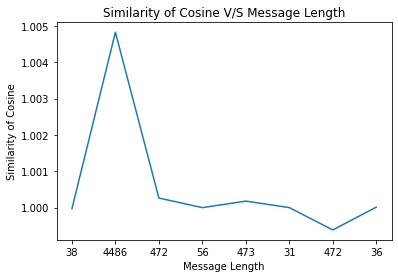

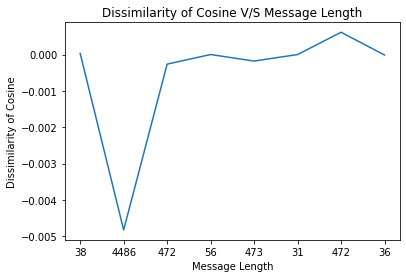

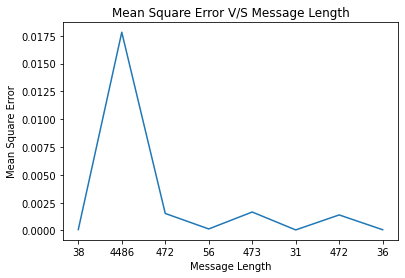

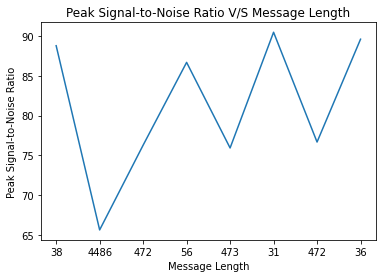

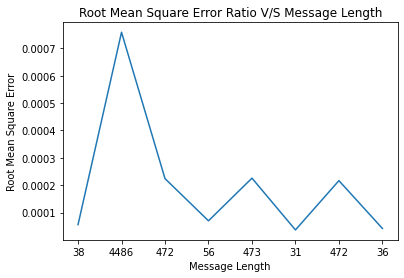

In [21]:


x_ticks=range(len(list_ch_len))

plt.plot(x_ticks, list_s_cos)
# plt.plot(list_ch_len, list_s_cos)
plt.xticks(x_ticks, list_ch_len)
plt.title('Similarity of Cosine V/S Message Length')
plt.xlabel('Message Length')
plt.ylabel('Similarity of Cosine')
plt.show()

plt.plot(x_ticks, list_ds_cos)
# plt.plot(list_ch_len, list_ds_cos)
plt.xticks(x_ticks, list_ch_len)
plt.title('Dissimilarity of Cosine V/S Message Length')
plt.xlabel('Message Length')
plt.ylabel('Dissimilarity of Cosine')
plt.show()

plt.plot(x_ticks, list_mse)
# plt.plot(list_ch_len, list_mse)
plt.xticks(x_ticks, list_ch_len)
plt.title('Mean Square Error V/S Message Length')
plt.xlabel('Message Length')
plt.ylabel('Mean Square Error')
plt.show()

plt.plot(x_ticks, list_psnr)
# plt.plot(list_ch_len, list_psnr)
plt.xticks(x_ticks, list_ch_len)
plt.title('Peak Signal-to-Noise Ratio V/S Message Length')
plt.xlabel('Message Length')
plt.ylabel('Peak Signal-to-Noise Ratio')
plt.show()

plt.plot(x_ticks, list_rmse)
# plt.plot(list_ch_len, list_rmse)
plt.xticks(x_ticks, list_ch_len)
plt.title('Root Mean Square Error Ratio V/S Message Length')
plt.xlabel('Message Length')
plt.ylabel('Root Mean Square Error')
plt.show()


[Text(0, 0.5, 'Root Mean Square Error'),
 Text(0.5, 0, 'Message Length')]

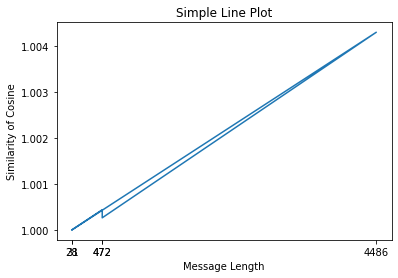

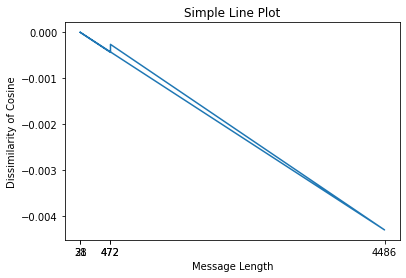

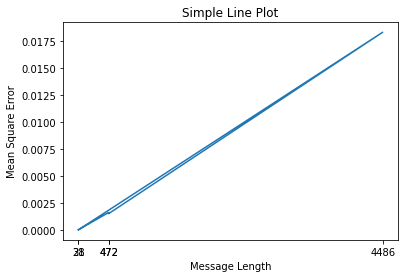

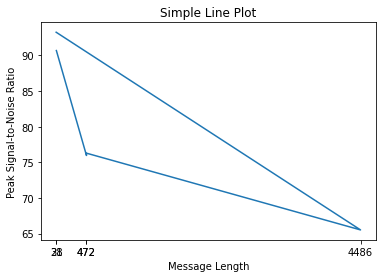

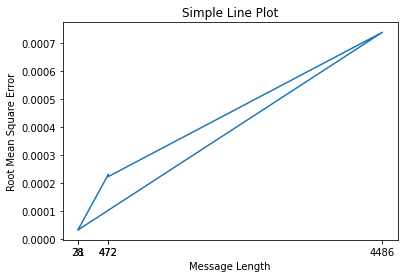

In [15]:
import pandas as pd

df=pd.DataFrame({"Message Length":list_ch_len,"Similarity of Cosine":list_s_cos,"Dissimilarity of Cosine":list_ds_cos,"Mean Square Error":list_mse,"Peak Signal-to-Noise Ratio":list_psnr,"Root Mean Square Error":list_rmse})
df
ax = df.plot(x="Message Length", y="Similarity of Cosine", kind="line", title ="Simple Line Plot", legend=False)
ax.set(ylabel='Similarity of Cosine', xlabel = 'Message Length', xticks =df["Message Length"])

ax = df.plot(x="Message Length", y="Dissimilarity of Cosine", kind="line", title ="Simple Line Plot", legend=False)
ax.set(ylabel='Dissimilarity of Cosine', xlabel = 'Message Length', xticks =df["Message Length"])

ax = df.plot(x="Message Length", y="Mean Square Error", kind="line", title ="Simple Line Plot", legend=False)
ax.set(ylabel='Mean Square Error', xlabel = 'Message Length', xticks =df["Message Length"])

ax = df.plot(x="Message Length", y="Peak Signal-to-Noise Ratio", kind="line", title ="Simple Line Plot", legend=False)
ax.set(ylabel='Peak Signal-to-Noise Ratio', xlabel = 'Message Length', xticks =df["Message Length"])

ax = df.plot(x="Message Length", y="Root Mean Square Error", kind="line", title ="Simple Line Plot", legend=False)
ax.set(ylabel='Root Mean Square Error', xlabel = 'Message Length', xticks =df["Message Length"])



**Dice Similarity Coefficient**

In [29]:
import cv2
import numpy as np

#load images
y_pred = cv2.imread('/content/IMGs1.png')
y_true = cv2.imread('/content/folder/Image Data Set FINAL/Image Data Set FINAL/GROUP ORIGINAL IMAGES/IMG1.PNG') 

# Dice similarity function
def dice(pred, true, k = 1):
    intersection = np.sum(pred[true==k]) * 2.0
    dice = intersection / (np.sum(pred) + np.sum(true))
    return dice

dice_score = dice(y_pred, y_true, k = 255) #255 in my case, can be 1 
print ("Dice Similarity: {}".format(dice_score))

Dice Similarity: 0.011376910679625112
